In [2]:
#0. 이파리 데이터를 로드한다
import loader_leaf

test_label = "/Users/macbook/test_label.csv"
test_image = "/Users/macbook/test"
train_label = "/Users/macbook/train_label.csv"
train_image = "/Users/macbook/train"

print(loader_leaf.image_load(test_image))
#print(loader_leaf.image_load(test_image).shape)

[None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None 

In [2]:
#1. 필요한 패키지를 다운로드한다
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)
#3. 정규화를 진행한다
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

#4. 정답 데이터를 one-hot-encoding한다
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#5. 신경망모델을 구성한다
model = Sequential()
initializer = tf.keras.initializers.GlorotNormal()
model.add(Dense(100, activation = 'relu', kernel_initializer=initializer, input_shape = (784, ))) #1층
model.add(BatchNormalization())
model.add(Dropout(0.2)) #신경망의 뉴런 20% 날리겠다
model.add(Dense(50, activation = 'relu', kernel_initializer=initializer)) #2층
model.add(BatchNormalization())
model.add(Dropout(0.2)) #신경망의 뉴런 20% 날리겠다
model.add(Dense(10, activation = 'softmax', kernel_initializer=initializer)) #3층

#6. 신경망 모델을 설정한다
model.compile(optimizer='RMSprop', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

#7. 신경망 모델을 훈련시킨다
from tensorflow.python.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    batch_size = 100, 
                    validation_data = (x_val, y_val),
                    callbacks=[early_stopping])
#8. 모델을 평가한다
model.evaluate(x_test, y_test)

#9. 테스트 데이터의 정확도를 확인한다
results = model.predict(x_test)

# 정확도 확인 
import  numpy  as  np

y_hat=np.argmax(results, axis=1)
y_label=np.argmax(y_test, axis=1)
sum(y_hat==y_label)/len(y_label)

Epoch 1/100
420/420 [==============================] - 4s 6ms/step - loss: 0.7174 - acc: 0.7849 - val_loss: 0.1883 - val_acc: 0.9443
Epoch 2/100
420/420 [==============================] - 2s 4ms/step - loss: 0.2171 - acc: 0.9370 - val_loss: 0.1448 - val_acc: 0.9569
Epoch 3/100
420/420 [==============================] - 2s 4ms/step - loss: 0.1691 - acc: 0.9479 - val_loss: 0.1181 - val_acc: 0.9644
Epoch 4/100
420/420 [==============================] - 1s 3ms/step - loss: 0.1371 - acc: 0.9591 - val_loss: 0.1074 - val_acc: 0.9680
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1046 - acc: 0.9687


0.9687

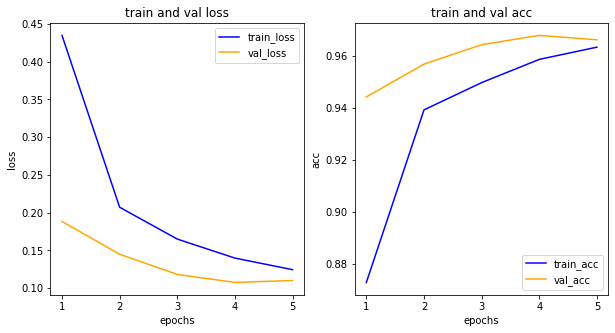

In [3]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()